# WebMD Drug Reviews Data Analysis

Hayley Caddes

If you want to see the plotly plots created here (won't be rendered in github), follow this _[link](http://nbviewer.jupyter.org/github/hkcaddes/PythonWebScrapingProject/blob/master/webmd/DrugReviewDataAnalysisV2.ipynb)_ to view this notebook in Jupyter's nb viewer.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [2]:
init_notebook_mode(connected=True)

In [3]:
drugs = pd.read_csv('webmd_Final.csv')

In [5]:
drugs.head()

,drug,date,condition,age,gender,treatment_length,reviewer_status,effectiveness,ease_of_use,satisfaction,comment
0,methadone oral,5/16/2018,Prevention of Opiate Drug Abuse,45-54,NaN,6 months to less than 1 year,Patient,5,5,5,I have been taking 70 mg of methadone for 2 mo...
1,methadone oral,4/10/2018,Pain,25-34,Male,1 to 6 months,Caregiver,3,4,5,Online shop where you get 100% authentic produ...
2,methadone oral,11/16/2017,Chronic Pain,55-64,NaN,5 to less than 10 years,Patient,5,5,5,"I have Fibromyalgia, and after going to severa..."
3,methadone oral,8/31/2017,Symptoms from Stopping Treatment with Opioid D...,65-74,Male,10 years or more,Patient,2,5,2,I've been taking pain meds for 40 years due to...
4,methadone oral,6/7/2017,Chronic Pain,25-34,NaN,10 years or more,Patient,5,5,5,I don't understand why other physicians say th...


In [6]:
drugs.date = pd.to_datetime(drugs.date)

In [7]:
print(drugs.shape)

(8448, 11)


In [8]:
import random
random.seed(0)

sample = drugs.sample(5)
sample

,drug,date,condition,age,gender,treatment_length,reviewer_status,effectiveness,ease_of_use,satisfaction,comment
7876,tramadol oral,2008-11-25,Pain,35-44,Female,less than 1 month,Patient,4,5,4,I am allergic to all NSAIDS. So after trial an...
106,methadone oral,2013-04-17,Other,45-54,Male,1 to less than 2 years,NaN,4,5,5,i TAKE IT ONLY FOR THE NICE GLOW IT GIVES ME. ...
7001,tramadol oral,2010-06-16,Pain,55-64,Male,1 to less than 2 years,Patient,4,5,4,Has worked well for control of moderate pain.
5814,tramadol oral,2014-06-25,Chronic Pain,55-64,Female,1 to 6 months,Patient,5,5,5,I use this medication only as needed every 4 h...
605,methadone oral,2009-10-27,Prevention of Opiate Drug Abuse,25-34,Female,1 to 6 months,Patient,2,4,1,i am going through withdrawal because i cant p...


## Business Case for non-opiod pain medications

__Market Research -- Questions that must be answered:__

1. Who are the customers?
2. What are the _expectations_?
3. What _market segments_ should be high priority?
4. What is the _competitive target_?
5. What _messages_ should be used launch the product?
6. What is the _ideal positioning_ for a new brand to ensure the greatest long-term commercial opportunity?


### Who are the customers?

#### What is the distribution of genders for each drugs' users?

In [9]:
# Filter reviews from caregivers out of the dataframe
patients = drugs.loc[(drugs.reviewer_status != 'Caregiver'),:]
print(patients.shape)

# group by drug & patient sex
group1 = patients.groupby(['drug', 'gender'], as_index=False)
# new dataframe with drug, gender, and total count of each category
data1 = patients.groupby(['drug', 'gender']).agg({'gender': 'count'}).rename(columns={'gender': 'total'}).reset_index()
data1

(8219, 11)


,drug,gender,total
0,Opana ER oral,Female,277
1,Opana ER oral,Male,187
2,OxyContin oral,Female,630
3,OxyContin oral,Male,643
4,methadone oral,Female,580
5,methadone oral,Male,430
6,morphine oral,Female,212
7,morphine oral,Male,210
8,oxycodone oral,Female,881
9,oxycodone oral,Male,814


In [11]:
# Color scales
import colorlover as cl
from IPython.display import HTML

In [12]:
HTML(cl.to_html(cl.scales['9']))

In [13]:
colorM = cl.scales['4']['div']['BrBG'][2]
colorF = cl.scales['10']['div']['PRGn'][1]

In [14]:
# Interactive plotly graph to see drug consumers by gender

drugNames = data1.drug.unique()

trace1 = go.Bar(x = drugNames, 
                y = data1.total[data1.gender == 'Male'] , 
                name = 'Male',
                marker = dict(color = colorM))
trace2 = go.Bar(x = drugNames, 
                y = data1.total[data1.gender == 'Female'] , 
                name = 'Female',
                marker = dict(color = colorF))

layout = go.Layout(title = 'Gender by Drug')
data = [trace1, trace2]
iplot(go.Figure(data = data, layout = layout))

#### Which age groups are the move prevalent patients?

In [15]:
# group by drug and age group
data2 = patients.groupby(['drug', 'age']).agg({'age': 'count'}).rename(columns={'age': 'total'}).reset_index()
data2.head(8)

,drug,age,total
0,Opana ER oral,19-24,10
1,Opana ER oral,25-34,52
2,Opana ER oral,35-44,106
3,Opana ER oral,45-54,183
4,Opana ER oral,55-64,99
5,Opana ER oral,65-74,22
6,Opana ER oral,75 or over,3
7,OxyContin oral,13-18,4


In [16]:
# interactive plot of age distribution
ages = sorted(data2.age.unique())

col = []
for i in range(0, len(ages)):
    col.append(cl.scales['9']['seq']['BuPu'][i+1])


trace = []
for i in range(0, len(ages)):
    trace.append(go.Bar(x = drugNames,
                        y = data2.total[data2.age == ages[i]], 
                        name = ages[i],
                        marker = dict(color = col[i])
                        ))
layout = go.Layout(title = 'Age Groups by Drug')
    
iplot(go.Figure(data = trace, layout = layout))

#### For how long do patients use these drugs?

In [17]:
# How long do patients typically use these drugs?

# group by drug and treatment length
data3 = patients.groupby(['drug', 'treatment_length']).agg({'treatment_length': 'count'}).rename(columns={'treatment_length': 'total'}).reset_index()
data3.head(7)

,drug,treatment_length,total
0,Opana ER oral,1 to 6 months,130
1,Opana ER oral,1 to less than 2 years,73
2,Opana ER oral,10 years or more,6
3,Opana ER oral,2 to less than 5 years,59
4,Opana ER oral,5 to less than 10 years,14
5,Opana ER oral,6 months to less than 1 year,56
6,Opana ER oral,less than 1 month,127


In [18]:
# interactive plot of treatment length
sortedLength = ['less than 1 month', '1 to 6 months', '6 months to less than 1 year', '1 to less than 2 years', '2 to less than 5 years', '5 to less than 10 years', '10 years or more']
col = []
for i in range(1, len(sortedLength)+1):
    col.append(cl.scales['9']['seq']['BuGn'][i+1])
    
trace = []
for i in range(0, len(sortedLength)):
    trace.append(go.Bar(x = drugNames,
                        y = data3.total[data3.treatment_length == sortedLength[i]], 
                        name = sortedLength[i],
                        marker = dict(color=col[i])
                        ))
layout = go.Layout(title = 'Treatment Length by Drug')
    
iplot(go.Figure(data = trace, layout = layout))

### What is the competitive target?

#### What is the distribution of the different conditions treated by all the pain medications in the dataset?

In [19]:
# Let's look at the different conditions
data4 = patients.groupby(['condition']).agg({'condition': 'count'}).rename(columns={'condition': 'total'}).reset_index()
data4

,condition,total
0,Acute Pain Following an Operation,16
1,Additional Agent to Induce General Anesthesia,2
2,Additional Local Anesthesia,1
3,Calming of Intubated Patient by Administration...,2
4,Chronic Pain,1489
5,Chronic Pain with Narcotic Drug Tolerance,437
6,Cough,1
7,"Disorder characterized by Stiff, Tender & Pain...",332
8,Drug Withdrawal Syndrome in Newborn Infant,3
9,Fluid in the Lungs,2


In [20]:
conditions = patients.condition.drop_duplicates().reset_index(drop=True)
conditions

0                       Prevention of Opiate Drug Abuse
1                                          Chronic Pain
2     Symptoms from Stopping Treatment with Opioid D...
3                                                  Pain
4                                           Severe Pain
5                                    Narcotic Addiction
6                                                 Other
7                                                   NaN
8                                                 Cough
9            Drug Withdrawal Syndrome in Newborn Infant
10            Chronic Pain with Narcotic Drug Tolerance
11                    Severe Pain with Opioid Tolerance
12        Additional Agent to Induce General Anesthesia
13    Calming of Intubated Patient by Administration...
14                                   Fluid in the Lungs
15                          Additional Local Anesthesia
16                    Acute Pain Following an Operation
17                                     Neuropath

In [21]:
# combine some conditions into groups
cg = {}
# Pain
cg['Acute Pain'] = [conditions[3], conditions[16]] 
# Chronic Pain
cg['Chronic Pain'] = [conditions[1], conditions[18]] 
# Neuropathic Pain
cg['Neuropathic Pain'] = [conditions[17]]
# Pain with drug tolerance
cg['Pain with Drug Tolerance'] = [conditions[10], conditions[11]]
# Other
cg['Other'] = [conditions[6], conditions[7], conditions[14]]
# Addiction/Drug abuse
cg['Drug Abuse'] = [conditions[5], conditions[0], conditions[2], conditions[9]]
# Severe pain
cg['Severe Pain'] = [conditions[4]]
# Muscle Pain
cg['Stiff, Tender, & Painful Muscles'] = [conditions[19]]
# Anesthesia
cg['Anesthesia'] = [conditions[12], conditions[13], conditions[15]]

In [22]:
# let's eliminate any of the conditions with less than 10 observations
# let's also look at the proportion of condition over the total (condition is a required field in writing a webmd drug review)
totPat = patients.shape[0]


data5 = data4[(data4.total >= 10)].sort_values('total', ascending=False).reset_index(drop=True)
print(data4.total.sum())
data5.total = data5.total.apply(lambda x: x/totPat)
data5

8218


,condition,total
0,Pain,0.501764
1,Chronic Pain,0.181166
2,Neuropathic Pain,0.098430
3,Chronic Pain with Narcotic Drug Tolerance,0.053169
4,Other,0.041003
5,"Disorder characterized by Stiff, Tender & Pain...",0.040394
6,Severe Pain,0.025551
7,Narcotic Addiction,0.024212
8,Severe Pain with Opioid Tolerance,0.010220
9,Prevention of Opiate Drug Abuse,0.010099


In [23]:
# add a 'group' column to data5
data5['group'] = data5['condition'].apply(lambda x: [key for key in cg.keys() for value in cg[key] if x == value][0])
data5

,condition,total,group
0,Pain,0.501764,Acute Pain
1,Chronic Pain,0.181166,Chronic Pain
2,Neuropathic Pain,0.098430,Neuropathic Pain
3,Chronic Pain with Narcotic Drug Tolerance,0.053169,Pain with Drug Tolerance
4,Other,0.041003,Other
5,"Disorder characterized by Stiff, Tender & Pain...",0.040394,"Stiff, Tender, & Painful Muscles"
6,Severe Pain,0.025551,Severe Pain
7,Narcotic Addiction,0.024212,Drug Abuse
8,Severe Pain with Opioid Tolerance,0.010220,Pain with Drug Tolerance
9,Prevention of Opiate Drug Abuse,0.010099,Drug Abuse


In [24]:
# lets clean up the drugs dataset so we can add a group column to the whole dataframe
drugs2 = drugs[(drugs.condition.isin([x for values in cg.values() for x in values]))].reset_index(drop = True)
drugs2.replace("NaN", np.nan, inplace = True)
print(drugs2.shape)
patients = drugs2.loc[(drugs2.reviewer_status != 'Caregiver'),:].reset_index(drop = True)
patients = patients.dropna(subset=['condition'])
print(patients.shape)


(8447, 11)
(8217, 11)


In [25]:
# let's also add group column to entire dataframe for easy grouping later
patients['group'] = patients['condition'].apply(lambda x: [key for key in cg.keys() for value in cg[key] if x == value][0])
patients.head()

,drug,date,condition,age,gender,treatment_length,reviewer_status,effectiveness,ease_of_use,satisfaction,comment,group
0,methadone oral,2018-05-16,Prevention of Opiate Drug Abuse,45-54,NaN,6 months to less than 1 year,Patient,5,5,5,I have been taking 70 mg of methadone for 2 mo...,Drug Abuse
1,methadone oral,2017-11-16,Chronic Pain,55-64,NaN,5 to less than 10 years,Patient,5,5,5,"I have Fibromyalgia, and after going to severa...",Chronic Pain
2,methadone oral,2017-08-31,Symptoms from Stopping Treatment with Opioid D...,65-74,Male,10 years or more,Patient,2,5,2,I've been taking pain meds for 40 years due to...,Drug Abuse
3,methadone oral,2017-06-07,Chronic Pain,25-34,NaN,10 years or more,Patient,5,5,5,I don't understand why other physicians say th...,Chronic Pain
4,methadone oral,2017-02-19,Chronic Pain,35-44,Female,2 to less than 5 years,Patient,5,5,5,I have had much pain relief from using methado...,Chronic Pain


In [26]:
specCol = cl.scales['9']['seq']['GnBu']
specCol40 = cl.to_rgb(cl.interp(specCol, 40))
HTML(cl.to_html(specCol40))

In [27]:
data6 = data5.groupby('group').agg({'total': 'sum'}).sort_values('total').reset_index()
data6

,group,total
0,Severe Pain,0.025551
1,Drug Abuse,0.036257
2,"Stiff, Tender, & Painful Muscles",0.040394
3,Other,0.041003
4,Pain with Drug Tolerance,0.063390
5,Neuropathic Pain,0.098430
6,Chronic Pain,0.189804
7,Acute Pain,0.503711


In [28]:
# interactive plot
groups = data6.group.unique()

col = []
for i in range(1, len(data6)+1):
    col.append(specCol40[i*3])
    
trace = [go.Bar(x = list(data6.group), y = list(data6.total), 
               marker = dict(color = col))]
layout = go.Layout(title = 'Proportion of Conditions Treated', 
                   yaxis = dict(title = 'Proportion'))
    
iplot(go.Figure(data = trace, layout = layout))

#### What is the distribution of conditions treated by drug?

In [29]:
# group by drug and condition group
data7 = patients.groupby(['drug', 'group']).agg({'group': 'count'}).rename(columns={'group': 'total_group'}).reset_index()
data7['total_drug'] = data7['drug'].apply(lambda x: sum(data7.total_group[data7.drug == x]))
data7['prop'] = data7['total_group']/data7['total_drug']
data7 = data7[data7.prop >= 0.01]
data7

,drug,group,total_group,total_drug,prop
0,Opana ER oral,Acute Pain,36,509,0.070727
1,Opana ER oral,Chronic Pain,251,509,0.493124
2,Opana ER oral,Other,11,509,0.021611
3,Opana ER oral,Pain with Drug Tolerance,134,509,0.263261
4,Opana ER oral,Severe Pain,77,509,0.151277
5,OxyContin oral,Acute Pain,75,1402,0.053495
6,OxyContin oral,Chronic Pain,885,1402,0.631241
7,OxyContin oral,Neuropathic Pain,95,1402,0.067760
8,OxyContin oral,Other,40,1402,0.028531
9,OxyContin oral,Pain with Drug Tolerance,303,1402,0.216120


In [30]:
# define function to return 0 if a drug doesn't have a certain group

def groupExist(group):
    props = []
    for name in drugNames:
        if group not in list(data7.group[data7.drug == name]):
            props.append(0)
        else:
            props.append(data7.prop[data7[(data7.group == group) & (data7.drug == name)].index.astype(int)[0]])
    return props
        #for group in groups:
            #if group == condition:
                #print(data7.)
        
y = groupExist("Neuropathic Pain")
y


[0, 0.06776034236804565, 0, 0, 0.2097716409984068, 0.1119298245614035]

In [31]:
col = {}
col['Severe Pain'] = cl.scales['9']['seq']['GnBu'][8]
col['Stiff, Tender, & Painful Muscles'] = cl.scales['9']['seq']['GnBu'][6]
col['Other'] = cl.scales['9']['seq']['GnBu'][5]
col['Anesthesia'] = cl.scales['9']['seq']['GnBu'][1]
col['Neuropathic Pain'] = cl.scales['9']['seq']['GnBu'][3]
col['Pain with Drug Tolerance'] = cl.scales['9']['seq']['GnBu'][2]
col['Chronic Pain'] = cl.scales['9']['seq']['GnBu'][4]
col['Acute Pain'] = cl.scales['9']['seq']['GnBu'][7]
col['Drug Abuse'] = cl.scales['9']['seq']['Greens'][4]

HTML(cl.to_html(list(col.values())))

In [32]:
groups

array(['Severe Pain', 'Drug Abuse', 'Stiff, Tender, & Painful Muscles',
       'Other', 'Pain with Drug Tolerance', 'Neuropathic Pain',
       'Chronic Pain', 'Acute Pain'], dtype=object)

In [33]:
#interactive plot
groups = data7.group.unique()
drugNames = data7.drug.unique()

#col = []
#for i in range(1, len(groups)+1):
#    col.append(specCol40[i*3])
#col.reverse()
    
trace = []
for i in range(0, len(groups)):
    trace.append(go.Bar(x = drugNames,
                        y = groupExist(groups[i]),
                        name = groups[i],
                        marker = dict(color=col[groups[i]])
                        ))
    
layout = go.Layout(title = 'Proportion of Conditions Treated', 
                   yaxis = dict(title = 'Proportion'))
    
iplot(go.Figure(data = trace, layout = layout))

#### What is the distribution of conditions treated by sex?

In [34]:
# group by sex and condition group
data8 = patients.groupby(['gender', 'group']).agg({'group': 'count'}).rename(columns={'group': 'total_group'}).reset_index()
data8['total_gender'] = data8['gender'].apply(lambda x: sum(data8.total_group[data8.gender == x]))
data8['prop'] = data8['total_group']/data8['total_gender']
data8 = data8[data8.prop >= 0.01]
data8

,gender,group,total_group,total_gender,prop
0,Female,Acute Pain,2267,4375,0.518171
2,Female,Chronic Pain,795,4375,0.181714
3,Female,Drug Abuse,162,4375,0.037029
4,Female,Neuropathic Pain,388,4375,0.088686
5,Female,Other,189,4375,0.043200
6,Female,Pain with Drug Tolerance,221,4375,0.050514
7,Female,Severe Pain,110,4375,0.025143
8,Female,"Stiff, Tender, & Painful Muscles",242,4375,0.055314
9,Male,Acute Pain,1513,3101,0.487907
11,Male,Chronic Pain,617,3101,0.198968


In [35]:
#interactive plot
groups = data8.group.unique()
    
trace = []
for i in range(0, len(groups)):
    trace.append(go.Bar(x = ["Female", "Male"],
                        y = data8.prop[data8.group == groups[i]],
                        name = groups[i],
                        marker = dict(color=col[groups[i]])
                        ))
    
layout = go.Layout(title = 'Proportion of Conditions Treated', 
                   yaxis = dict(title = 'Proportion'))
    
iplot(go.Figure(data = trace, layout = layout))

#### What is the distribution of conditions treated by treatment length?

In [36]:
# group by sex and condition group
data9 = patients.groupby(['treatment_length', 'group']).agg({'group': 'count'}).rename(columns={'group': 'total_group'}).reset_index()
data9['total_length'] = data9['treatment_length'].apply(lambda x: sum(data9.total_group[data9.treatment_length == x]))
data9['prop'] = data9['total_group']/data9['total_length']
data9 = data9[data9.prop >= 0.01]
data9

,treatment_length,group,total_group,total_length,prop
0,1 to 6 months,Acute Pain,744,1392,0.534483
1,1 to 6 months,Chronic Pain,241,1392,0.173132
2,1 to 6 months,Drug Abuse,35,1392,0.025144
3,1 to 6 months,Neuropathic Pain,139,1392,0.099856
4,1 to 6 months,Other,49,1392,0.035201
5,1 to 6 months,Pain with Drug Tolerance,76,1392,0.054598
6,1 to 6 months,Severe Pain,33,1392,0.023707
7,1 to 6 months,"Stiff, Tender, & Painful Muscles",75,1392,0.053879
8,1 to less than 2 years,Acute Pain,477,948,0.503165
10,1 to less than 2 years,Chronic Pain,196,948,0.206751


In [37]:
sortedLength

['less than 1 month',
 '1 to 6 months',
 '6 months to less than 1 year',
 '1 to less than 2 years',
 '2 to less than 5 years',
 '5 to less than 10 years',
 '10 years or more']

In [38]:
dictLength = {key:value for value, key in enumerate(sortedLength)}
dictLength  

{'1 to 6 months': 1,
 '1 to less than 2 years': 3,
 '10 years or more': 6,
 '2 to less than 5 years': 4,
 '5 to less than 10 years': 5,
 '6 months to less than 1 year': 2,
 'less than 1 month': 0}

In [39]:
# sort the dataframe by treatment_length in custom order sortedLength
data9['treatment_length'] = pd.Categorical(data9['treatment_length'], sortedLength)
data9 = data9.sort_values('treatment_length')
data9

,treatment_length,group,total_group,total_length,prop
58,less than 1 month,"Stiff, Tender, & Painful Muscles",94,1580,0.059494
56,less than 1 month,Pain with Drug Tolerance,72,1580,0.045570
55,less than 1 month,Other,94,1580,0.059494
54,less than 1 month,Neuropathic Pain,124,1580,0.078481
53,less than 1 month,Drug Abuse,23,1580,0.014557
52,less than 1 month,Chronic Pain,215,1580,0.136076
50,less than 1 month,Acute Pain,911,1580,0.576582
57,less than 1 month,Severe Pain,46,1580,0.029114
0,1 to 6 months,Acute Pain,744,1392,0.534483
5,1 to 6 months,Pain with Drug Tolerance,76,1392,0.054598


In [40]:
#interactive plot
groups = data9.group.unique()
    
trace = []
for i in range(0, len(groups)):
    trace.append(go.Bar(x = sortedLength,
                        y = data9.prop[data9.group == groups[i]],
                        name = groups[i],
                        marker = dict(color=col[groups[i]])
                        ))
    
layout = go.Layout(title = 'Proportion of Conditions Treated', 
                   yaxis = dict(title = 'Proportion'))
    
iplot(go.Figure(data = trace, layout = layout))

### What are the expectations?

#### Average rating by drug

In [41]:
# group by drug and get the mean rating for each
data10 = patients.groupby(['drug']).agg({'effectiveness': 'mean', 'ease_of_use': 'mean', 'satisfaction': 'mean'}).reset_index()
data10

,drug,effectiveness,ease_of_use,satisfaction
0,Opana ER oral,3.447937,4.233792,3.304519
1,OxyContin oral,3.811698,4.250357,3.642653
2,methadone oral,4.159487,4.274977,3.856095
3,morphine oral,3.460581,4.234440,3.319502
4,oxycodone oral,3.917153,4.347849,3.737653
5,tramadol oral,3.282456,4.199298,3.078246


In [42]:
ratings = list(data10.columns.values)[1:]
ratings

['effectiveness', 'ease_of_use', 'satisfaction']

In [43]:
#interactive plot
col = {}
col['effectiveness'] = cl.scales['6']['seq']['PuBu'][3]
col['ease_of_use'] = cl.scales['6']['seq']['PuRd'][3]
col['satisfaction'] = cl.scales['6']['seq']['YlOrBr'][3]


trace = []
for i in range(0, len(ratings)):
    trace.append(go.Bar(x = list(data10.drug),
                        y = list(data10[ratings[i]]),
                        name = ratings[i],
                        marker = dict(color=col[ratings[i]])
                        ))
    
layout = go.Layout(title = 'Average Rating by Drug', 
                   yaxis = dict(title = 'Rating'))
    
iplot(go.Figure(data = trace, layout = layout))

#### Average rating by condition

In [44]:
# group by condition group and get the mean rating for each
data11 = patients.groupby(['group']).agg({'effectiveness': 'mean', 'ease_of_use': 'mean', 'satisfaction': 'mean'}).reset_index()
data11

,group,effectiveness,ease_of_use,satisfaction
0,Acute Pain,3.632367,4.276812,3.424638
1,Anesthesia,3.000000,3.800000,2.600000
2,Chronic Pain,3.607692,4.235256,3.435256
3,Drug Abuse,4.358804,4.079734,3.760797
4,Neuropathic Pain,3.705810,4.280593,3.585909
5,Other,3.433628,4.056047,3.230088
6,Pain with Drug Tolerance,3.750480,4.335893,3.642994
7,Severe Pain,3.652381,4.314286,3.390476
8,"Stiff, Tender, & Painful Muscles",3.493976,4.250000,3.370482


In [45]:
# interactive plot

trace = []
for i in range(0, len(ratings)):
    trace.append(go.Bar(x = list(data11.group),
                        y = list(data11[ratings[i]]),
                        name = ratings[i],
                        marker = dict(color=col[ratings[i]])
                        ))
    
layout = go.Layout(title = 'Average Rating by Condition', 
                   yaxis = dict(title = 'Rating'))
    
iplot(go.Figure(data = trace, layout = layout))

#### Simple statistical analysis

In [46]:
# let's compare means of ratings by drug
# use one way anova
from scipy import stats

In [47]:
data10

,drug,effectiveness,ease_of_use,satisfaction
0,Opana ER oral,3.447937,4.233792,3.304519
1,OxyContin oral,3.811698,4.250357,3.642653
2,methadone oral,4.159487,4.274977,3.856095
3,morphine oral,3.460581,4.234440,3.319502
4,oxycodone oral,3.917153,4.347849,3.737653
5,tramadol oral,3.282456,4.199298,3.078246


In [48]:
# ratings by drug
# effectiveness

# create list of dataframes to feed the anova test
eff_by_drug = [pd.DataFrame({drug: patients[(patients["drug"] == drug)]["effectiveness"].values}) for drug in patients.drug.unique()]


stats.f_oneway(*[eff_by_drug[i].iloc[:, 0].values for i in range(0,6)])

F_onewayResult(statistic=106.54427812328534, pvalue=2.483405577779159e-109)

Can reject the null hypothesis that there is no difference between the means of the different drugs' effectiveness ratings

In [49]:
# see if individual drug's effectiveness is different than mean
mean_eff = patients['effectiveness'].mean()
mean_eff

3.65534866739686

In [50]:
# One-sample ttest

for i in range(0, 6):
    t_val, p_val = stats.ttest_1samp(eff_by_drug[i].iloc[:, 0].values, mean_eff)
    print("{} has a p-value of : {}".format(eff_by_drug[i].columns[0], p_val))

methadone oral has a p-value of : 8.725139721932838e-48
morphine oral has a p-value of : 0.0004470126191004339
Opana ER oral has a p-value of : 0.0007529882163308979
oxycodone oral has a p-value of : 2.533721426309672e-23
OxyContin oral has a p-value of : 6.413618246179952e-06
tramadol oral has a p-value of : 1.035428488896346e-42


Can also reject the null hypothesis for all drugs, and there is a statistically significant difference between the effectiveness ratings to the overall effectiveness rating mean.

In [51]:
# let's do for different drugs, but for ease_of_use
ease_by_drug = [pd.DataFrame({drug: patients[(patients["drug"] == drug)]["ease_of_use"].values}) for drug in patients.drug.unique()]


stats.f_oneway(*[ease_by_drug[i].iloc[:, 0].values for i in range(0,6)])

F_onewayResult(statistic=4.186080723651213, pvalue=0.000843277418139096)

Can reject the null hypothesis that there is no difference between the means of the different drugs' ease of use ratings

In [52]:
mean_ease = patients['ease_of_use'].mean()
mean_ease

4.256297918948522

In [53]:
# One-sample ttest compare to mean

for i in range(0, 6):
    t_val, p_val = stats.ttest_1samp(ease_by_drug[i].iloc[:, 0].values, mean_ease)
    print("{} has a p-value of : {}".format(ease_by_drug[i].columns[0], p_val))

methadone oral has a p-value of : 0.5765170926094846
morphine oral has a p-value of : 0.6556960087073682
Opana ER oral has a p-value of : 0.6514886271096907
oxycodone oral has a p-value of : 8.365301181480042e-05
OxyContin oral has a p-value of : 0.8488894850483456
tramadol oral has a p-value of : 0.008784368041534213


Can also reject the null hypothesis for oxycodone and tramadol, and there is a statistically significant difference between the ease of use ratings to the average overall ease of use rating.

In [54]:
# let's do for different drugs, but for satisfaction
sat_by_drug = [pd.DataFrame({drug: patients[(patients["drug"] == drug)]["satisfaction"].values}) for drug in patients.drug.unique()]


stats.f_oneway(*[sat_by_drug[i].iloc[:, 0].values for i in range(0,6)])

F_onewayResult(statistic=75.72757466125637, pvalue=7.685027337214558e-78)

Can reject the null hypothesis that there is no difference between the means of the different drugs' satisfaction ratings

In [55]:
mean_sat = patients['satisfaction'].mean()
mean_sat

3.457101131799927

In [56]:
# One-sample ttest compare to mean

for i in range(0, 6):
    t_val, p_val = stats.ttest_1samp(sat_by_drug[i].iloc[:, 0].values, mean_sat)
    print("{} has a p-value of : {}".format(sat_by_drug[i].columns[0], p_val))

methadone oral has a p-value of : 4.689833638982274e-22
morphine oral has a p-value of : 0.027579383125392133
Opana ER oral has a p-value of : 0.0228900010873999
oxycodone oral has a p-value of : 1.6033815926695293e-20
OxyContin oral has a p-value of : 2.3547758052869393e-06
tramadol oral has a p-value of : 3.497837978127451e-36


Can also reject the null hypothesis for all drugs, and there is a statistically significant difference between the satisfaction ratings to the average overall satisfaction rating.

In [57]:
# by condition
# compare effectiveness
data11.drop(1, axis = 0, inplace = True)
data11 = data11.reset_index(drop = True)
data11

,group,effectiveness,ease_of_use,satisfaction
0,Acute Pain,3.632367,4.276812,3.424638
1,Chronic Pain,3.607692,4.235256,3.435256
2,Drug Abuse,4.358804,4.079734,3.760797
3,Neuropathic Pain,3.705810,4.280593,3.585909
4,Other,3.433628,4.056047,3.230088
5,Pain with Drug Tolerance,3.750480,4.335893,3.642994
6,Severe Pain,3.652381,4.314286,3.390476
7,"Stiff, Tender, & Painful Muscles",3.493976,4.250000,3.370482


In [58]:
conds = np.delete(patients.group.unique(),6)
conds

array(['Drug Abuse', 'Chronic Pain', 'Acute Pain', 'Severe Pain', 'Other',
       'Pain with Drug Tolerance', 'Neuropathic Pain',
       'Stiff, Tender, & Painful Muscles'], dtype=object)

In [59]:
# let's do for different conditions, effectiveness
eff_by_cond = [pd.DataFrame({group: patients[(patients["group"] == group)]["effectiveness"].values}) for group in conds]


stats.f_oneway(*[eff_by_cond[i].iloc[:, 0].values for i in range(0,8)])

F_onewayResult(statistic=15.41578561265834, pvalue=3.429974251922186e-20)

Can reject the null hypothesis that there is no difference between the means of the different conditions' effectiveness ratings

In [60]:
mean_eff

3.65534866739686

In [61]:
# One-sample ttest compare to mean

for i in range(0, 8):
    t_val, p_val = stats.ttest_1samp(eff_by_cond[i].iloc[:, 0].values, mean_eff)
    print("{} has a p-value of : {}".format(eff_by_cond[i].columns[0], p_val))

Drug Abuse has a p-value of : 7.020828920071345e-26
Chronic Pain has a p-value of : 0.17572285697748607
Acute Pain has a p-value of : 0.2606465952934719
Severe Pain has a p-value of : 0.9748378462768654
Other has a p-value of : 0.005819827612443291
Pain with Drug Tolerance has a p-value of : 0.0688408967106731
Neuropathic Pain has a p-value of : 0.24582309679518605
Stiff, Tender, & Painful Muscles has a p-value of : 0.031713531776917867


Can reject the null hypothesis for Drug Abuse, Stiff Muscles, and Other, and there is a statistically significant difference between the effectiveness ratings to the average overall effectiveness rating.

In [62]:
# let's do for different conditions, ease of use
ease_by_cond = [pd.DataFrame({group: patients[(patients["group"] == group)]["ease_of_use"].values}) for group in conds]


stats.f_oneway(*[ease_by_cond[i].iloc[:, 0].values for i in range(0,8)])

F_onewayResult(statistic=3.445029862189486, pvalue=0.0010998407437798653)

Can reject the null hypothesis that there is no difference between the means of the different conditions' ease of use ratings

In [63]:
mean_ease

4.256297918948522

In [64]:
# One-sample ttest compare to mean

for i in range(0, 8):
    t_val, p_val = stats.ttest_1samp(ease_by_cond[i].iloc[:, 0].values, mean_ease)
    print("{} has a p-value of : {}".format(ease_by_cond[i].columns[0], p_val))

Drug Abuse has a p-value of : 0.012331565835121634
Chronic Pain has a p-value of : 0.47559455186433
Acute Pain has a p-value of : 0.22605133181215034
Severe Pain has a p-value of : 0.45140377058632186
Other has a p-value of : 0.004867452153977952
Pain with Drug Tolerance has a p-value of : 0.07741243043536816
Neuropathic Pain has a p-value of : 0.5112330695785285
Stiff, Tender, & Painful Muscles has a p-value of : 0.9193255816206463


Can reject the null hypothesis for Drug Abuse, and Other, and there is a statistically significant difference between the ease of use ratings to the average overall ease of use rating.

In [65]:
# let's do for different conditions, satisfaction
sat_by_cond = [pd.DataFrame({group: patients[(patients["group"] == group)]["satisfaction"].values}) for group in conds]


stats.f_oneway(*[sat_by_cond[i].iloc[:, 0].values for i in range(0,8)])

F_onewayResult(statistic=5.529669734994185, pvalue=2.3007457310693943e-06)

Can reject the null hypothesis that there is no difference between the means of the different conditions' satisfaction ratings

In [66]:
mean_sat

3.457101131799927

In [67]:
# One-sample ttest compare to mean

for i in range(0, 8):
    t_val, p_val = stats.ttest_1samp(sat_by_cond[i].iloc[:, 0].values, mean_sat)
    print("{} has a p-value of : {}".format(sat_by_cond[i].columns[0], p_val))

Drug Abuse has a p-value of : 0.00013481772802832257
Chronic Pain has a p-value of : 0.5782546502694229
Acute Pain has a p-value of : 0.15889245274269592
Severe Pain has a p-value of : 0.5347869179186457
Other has a p-value of : 0.009344024679447368
Pain with Drug Tolerance has a p-value of : 0.0018664277090261342
Neuropathic Pain has a p-value of : 0.008370881957441354
Stiff, Tender, & Painful Muscles has a p-value of : 0.30197079372016256


Can reject the null hypothesis for Drug Abuse, Pain with Drug Tolerance, Neuropathic Pain, and Other, and there is a statistically significant difference between the satisfaction ratings to the average overall ease of use rating.

### How to position the product for marketing

#### Word Cloud

In [68]:
# Preprocessing
import re

# get rid of NaN comments
drugs3 = drugs2.dropna(subset=['comment'])
# Convert all the string to lower cases
drugs3['comment'] = drugs3['comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# replace all empty spaces with just one
drugs3['comment'] = drugs3['comment'].apply(lambda x: re.sub('\s+', " ", x))
# get rid of empty strings
drugs3 = drugs3.loc[drugs3['comment'] != ""]

drugs3.shape

(7019, 11)

In [69]:
import nltk
# Filtering
# remove punctuation
drugs3['comment'] = drugs3['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hkcad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
# list of names to add to stopwords
names = [name.lower().split()[0] for name in list(drugNames)]
names

['opana', 'oxycontin', 'methadone', 'morphine', 'oxycodone', 'tramadol']

In [72]:
# Filtering
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(('prescribe', 'prescribed', 'perscribe', 'perscribed'))
stop.extend(tuple(names))
stop.extend(('drug', 'drugs', 'take', 'took', 'med', 'medication', 'meds'))
stop.extend(('medic', 'help', 'work', 'day', 'doctor', 'go', 'methadon'))
stop.extend(('dont', 'well', 'use', 'need', 'one', 'time', 'year'))
stop.extend(('people', 'peopl', 'realli', 'im', 'ive', 'start', 'make'))

In [73]:
drugs3['comment'] = drugs3['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
drugs3.sample(5)

,drug,date,condition,age,gender,treatment_length,reviewer_status,effectiveness,ease_of_use,satisfaction,comment
2250,oxycodone oral,2014-06-02,Pain,NaN,Male,less than 1 month,Patient,2,2,3,taking 2 weeks experiencing alot negative affe...
4776,OxyContin oral,2010-08-23,Chronic Pain with Narcotic Drug Tolerance,45-54,Male,10 years or more,Patient,3,4,3,difficulty first way much tolerance high troub...
3190,oxycodone oral,2010-02-04,Pain,35-44,Male,6 months to less than 1 year,Patient,3,3,3,takes care pain lower back
3646,oxycodone oral,2009-02-09,Other,45-54,Female,2 to less than 5 years,Patient,4,5,5,works wonderfully usually night due drowsiness...
492,methadone oral,2010-03-07,Pain,45-54,Male,2 to less than 5 years,Patient,5,5,5,effective pain reliver stays system long enoug...


In [74]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

drugs3['comment'] = drugs3['comment'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

In [75]:
# Word Cloud
from wordcloud import WordCloud

In [76]:
wc = WordCloud(background_color = "white", max_words = 100)
# generate word cloud
wc.generate(''.join(drugs3['comment']))

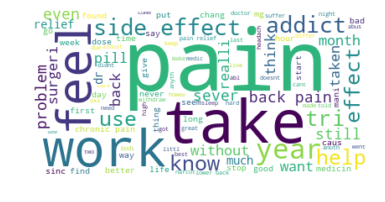

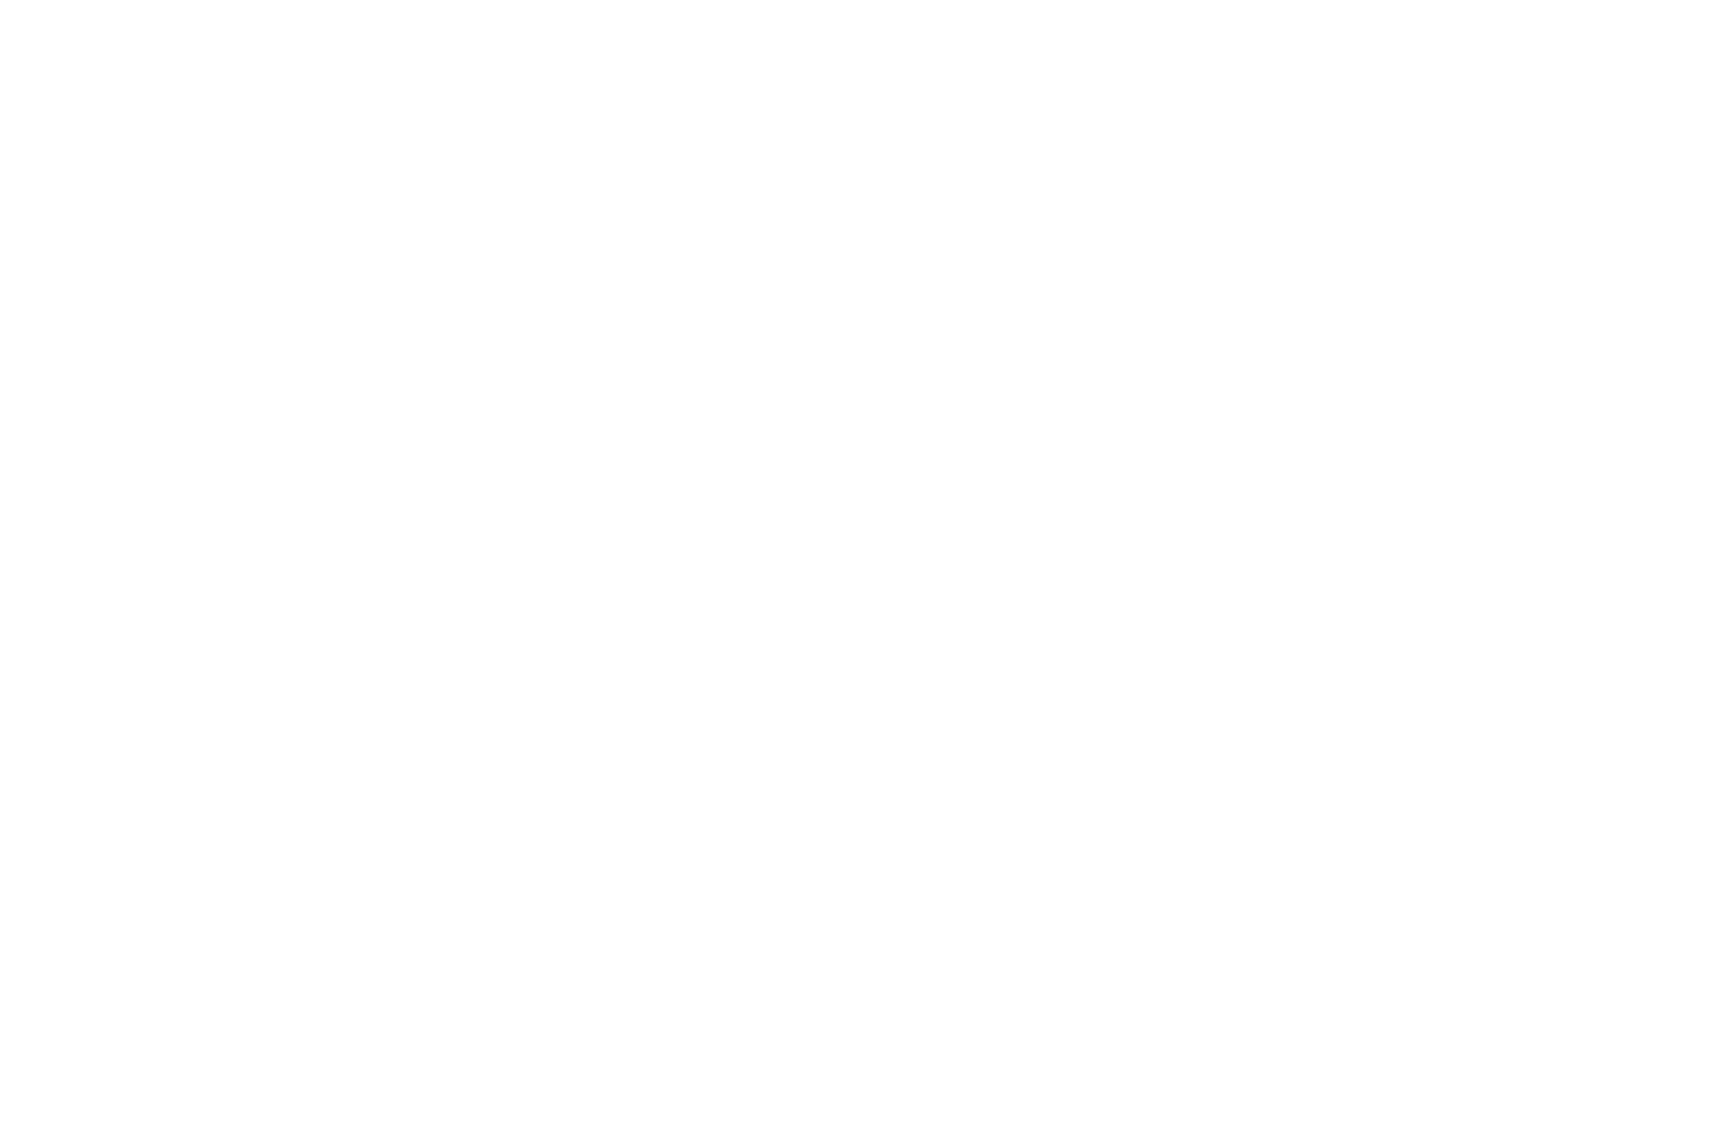

In [77]:
# show wordcloud
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.figure(figsize=(30, 20))
plt.axis('off')
plt.show()

#### Let's try sentiment analysis

In [78]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['comment'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

drugs4 = drugs3.apply(sentiment_func, axis=1)

In [79]:
drugs4.head()

,drug,date,condition,age,gender,treatment_length,reviewer_status,effectiveness,ease_of_use,satisfaction,comment,polarity,subjectivity
0,methadone oral,2018-05-16,Prevention of Opiate Drug Abuse,45-54,NaN,6 months to less than 1 year,Patient,5,5,5,take 70 mg 2 month miracl abl complet releas h...,0.178788,0.494444
1,methadone oral,2018-04-10,Pain,25-34,Male,1 to 6 months,Caregiver,3,4,5,onlin shop get 100 authent product pharmaci fo...,0.000000,0.100000
2,methadone oral,2017-11-16,Chronic Pain,55-64,NaN,5 to less than 10 years,Patient,5,5,5,fibromyalgia go sever doctor thought seek foun...,0.062500,0.756944
3,methadone oral,2017-08-31,Symptoms from Stopping Treatment with Opioid D...,65-74,Male,10 years or more,Patient,2,5,2,take pain 40 year due industri accid 1978 didn...,0.131818,0.289394
4,methadone oral,2017-06-07,Chronic Pain,25-34,NaN,10 years or more,Patient,5,5,5,understand physician say best salut treat chro...,0.209375,0.534375


In [80]:
# scatter plot of sentiment vs ratings
trace = go.Scatter(x = drugs4['effectiveness'], 
                   y = drugs4['polarity'], 
                   mode = 'markers', hoverinfo = 'none')

layout = go.Layout(title = 'Sentiment for Effectiveness', 
                   yaxis = dict(title = 'Polarity'), 
                   xaxis = dict(title = 'Rating'))
    
iplot(go.Figure(data = [trace], layout = layout))

In [81]:
# scatter plot of sentiment vs ratings
trace = go.Scatter(x = drugs4['ease_of_use'], 
                   y = drugs4['polarity'], 
                   mode = 'markers', hoverinfo = 'none')

layout = go.Layout(title = 'Sentiment for Ease of Use', 
                   yaxis = dict(title = 'Polarity'), 
                   xaxis = dict(title = 'Rating'))
    
iplot(go.Figure(data = [trace], layout = layout))

In [82]:
# scatter plot of sentiment vs ratings
trace = go.Scatter(x = drugs4['satisfaction'], 
                   y = drugs4['polarity'], 
                   mode = 'markers', hoverinfo = 'none')

layout = go.Layout(title = 'Sentiment for Satisfaction', 
                   yaxis = dict(title = 'Polarity'), 
                   xaxis = dict(title = 'Rating'))
    
iplot(go.Figure(data = [trace], layout = layout))

In [83]:
from plotly import tools
# stack those plots
trace1 = go.Scatter(x = drugs4['effectiveness'], 
                   y = drugs4['polarity'], 
                   mode = 'markers', hoverinfo = 'none', name = "Effectiveness")
trace2 = go.Scatter(x = drugs4['ease_of_use'], 
                   y = drugs4['polarity'], 
                   mode = 'markers', hoverinfo = 'none', name = "Ease of Use")
trace3 = go.Scatter(x = drugs4['satisfaction'], 
                   y = drugs4['polarity'], 
                   mode = 'markers', hoverinfo = 'none', name = "Satisfaction")
fig = tools.make_subplots(rows=3, cols=1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)

fig['layout'].update(height = 900, width = 600, title = "Sentiment Analysis")
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]

